Learning Rate: 0.1, Epoch 500, Loss: nan
Learning Rate: 0.1, Epoch 1000, Loss: nan
Learning Rate: 0.1, Epoch 1500, Loss: nan
Learning Rate: 0.1, Epoch 2000, Loss: nan
Learning Rate: 0.1, Epoch 2500, Loss: nan
Learning Rate: 0.1, Epoch 3000, Loss: nan
Learning Rate: 0.1, Epoch 3500, Loss: nan
Learning Rate: 0.1, Epoch 4000, Loss: nan
Learning Rate: 0.1, Epoch 4500, Loss: nan
Learning Rate: 0.1, Epoch 5000, Loss: nan
Learning Rate: 0.01, Epoch 500, Loss: 0.008165464736521244
Learning Rate: 0.01, Epoch 1000, Loss: 0.005551747512072325
Learning Rate: 0.01, Epoch 1500, Loss: 0.003775789635255933
Learning Rate: 0.01, Epoch 2000, Loss: 0.002567938296124339
Learning Rate: 0.01, Epoch 2500, Loss: 0.0017464730190113187
Learning Rate: 0.01, Epoch 3000, Loss: 0.001187798217870295
Learning Rate: 0.01, Epoch 3500, Loss: 0.0008078280952759087
Learning Rate: 0.01, Epoch 4000, Loss: 0.0005494136712513864
Learning Rate: 0.01, Epoch 4500, Loss: 0.0003736594517249614
Learning Rate: 0.01, Epoch 5000, Loss:

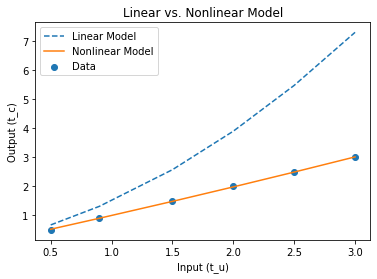

Best Learning Rate: 0.01, Best Loss: 0.0002541294670663774


In [2]:
#PROBLEM 1

import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the nonlinear model
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss function (Mean Squared Error)
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

# Input data
t_u = torch.tensor([0.5, 0.9, 1.5, 2.0, 2.5, 3.0])
t_c = torch.tensor([0.5, 0.9, 1.5, 2.0, 2.5, 3.0])

# Training loop
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_epochs = 5000
report_interval = 500

best_loss = float('inf')
best_learning_rate = None
best_model = None

for lr in learning_rates:
    w2 = torch.tensor([1.0], requires_grad=True)
    w1 = torch.tensor([1.0], requires_grad=True)
    b = torch.tensor([1.0], requires_grad=True)

    optimizer = optim.SGD([w2, w1, b], lr=lr)

    for epoch in range(1, num_epochs + 1):
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % report_interval == 0:
            print(f"Learning Rate: {lr}, Epoch {epoch}, Loss: {loss.item()}")

    if loss < best_loss:
        best_loss = loss
        best_learning_rate = lr
        best_model = (w2, w1, b)

# Visualize the best nonlinear model and compare it to the linear model
linear_model = (torch.tensor([0.5]), torch.tensor([0.9]), torch.tensor([0.1]))

t_p_linear = model(t_u, *linear_model).detach().numpy()
t_p_nonlinear = model(t_u, *best_model).detach().numpy()

plt.plot(t_u, t_p_linear, label="Linear Model", linestyle='--')
plt.plot(t_u, t_p_nonlinear, label="Nonlinear Model", linestyle='-')
plt.scatter(t_u, t_c, label="Data")
plt.legend()
plt.xlabel("Input (t_u)")
plt.ylabel("Output (t_c)")
plt.title("Linear vs. Nonlinear Model")
plt.show()

print(f"Best Learning Rate: {best_learning_rate}, Best Loss: {best_loss.item()}")


Training with learning rate: 0.1
Epoch 0, Train Loss: 23931401013993.152, Val Loss: 6651761117547.843
Epoch 500, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.9602
Epoch 1000, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 1500, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 2000, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 2500, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 3000, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 3500, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 4000, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962
Epoch 4500, Train Loss: 1498528369543.8071, Val Loss: 2124252182109.962


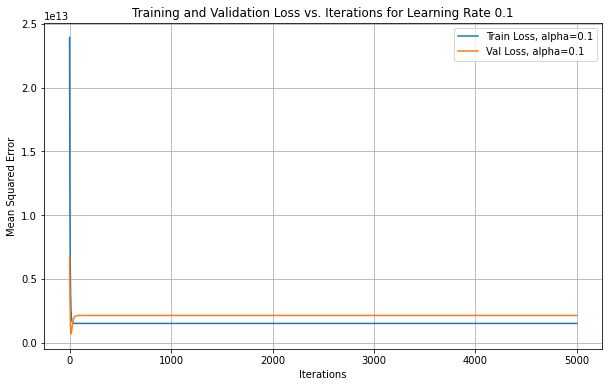

Validation Accuracy for learning rate 0.1: -11.487365541199736

Training with learning rate: 0.01
Epoch 0, Train Loss: 30127972355872.48, Val Loss: 7481508770744.467
Epoch 500, Train Loss: 1501096578706.1194, Val Loss: 1982204980906.9253
Epoch 1000, Train Loss: 1498533296771.822, Val Loss: 2122407499328.33
Epoch 1500, Train Loss: 1498528446889.8262, Val Loss: 2124218752936.031
Epoch 2000, Train Loss: 1498528371941.3271, Val Loss: 2124251253821.7734
Epoch 2500, Train Loss: 1498528369640.2988, Val Loss: 2124252148188.3406
Epoch 3000, Train Loss: 1498528369548.0273, Val Loss: 2124252180709.1362
Epoch 3500, Train Loss: 1498528369543.9966, Val Loss: 2124252182049.048
Epoch 4000, Train Loss: 1498528369543.8154, Val Loss: 2124252182107.255
Epoch 4500, Train Loss: 1498528369543.8076, Val Loss: 2124252182109.767


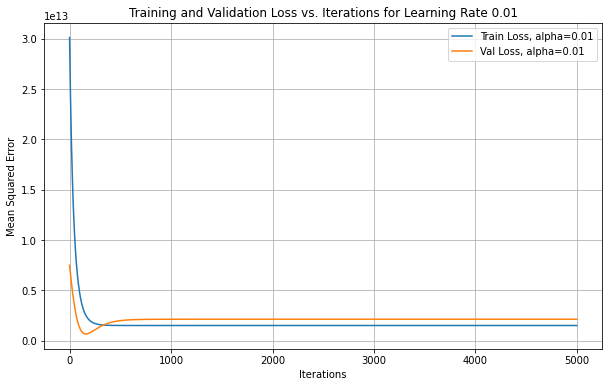

Validation Accuracy for learning rate 0.01: -11.487365541198928

Training with learning rate: 0.001
Epoch 0, Train Loss: 30796784747208.098, Val Loss: 7572382256473.932
Epoch 500, Train Loss: 10617421823393.799, Val Loss: 3407392502277.4585
Epoch 1000, Train Loss: 4781812040952.114, Val Loss: 1283253636528.834
Epoch 1500, Train Loss: 2762544595831.21, Val Loss: 672452225557.2986
Epoch 2000, Train Loss: 1999816631130.2942, Val Loss: 764759703254.2651
Epoch 2500, Train Loss: 1700538240536.4106, Val Loss: 1066880181729.5602
Epoch 3000, Train Loss: 1580950029518.2056, Val Loss: 1369475165949.6133
Epoch 3500, Train Loss: 1532597694183.3064, Val Loss: 1609429232358.8362
Epoch 4000, Train Loss: 1512834559006.2207, Val Loss: 1781961419963.1682
Epoch 4500, Train Loss: 1504656016807.2634, Val Loss: 1899985015997.3623


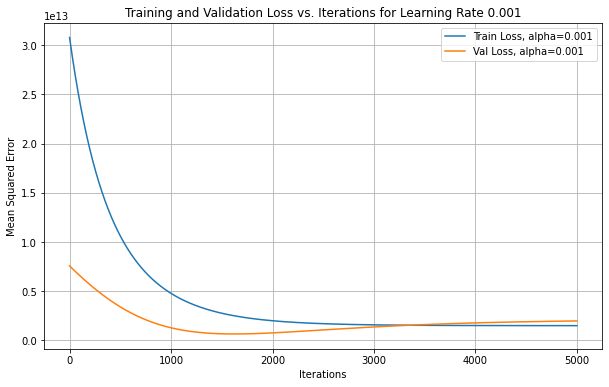

Validation Accuracy for learning rate 0.001: -10.629997256761627

Training with learning rate: 0.0001
Epoch 0, Train Loss: 30864157538913.137, Val Loss: 7581548592250.975
Epoch 500, Train Loss: 27380216952182.004, Val Loss: 7080720131616.256
Epoch 1000, Train Loss: 24364998539710.074, Val Loss: 6597239379892.351
Epoch 1500, Train Loss: 21747999664853.12, Val Loss: 6131170889675.54
Epoch 2000, Train Loss: 19470214312016.598, Val Loss: 5683056183074.205
Epoch 2500, Train Loss: 17482161747031.535, Val Loss: 5253664184432.145
Epoch 3000, Train Loss: 15742262966282.527, Val Loss: 4843818403178.017
Epoch 3500, Train Loss: 14215502627098.945, Val Loss: 4454281783157.266
Epoch 4000, Train Loss: 12872325405736.188, Val Loss: 4085684383327.0327
Epoch 4500, Train Loss: 11687724941658.324, Val Loss: 3738482416909.3774


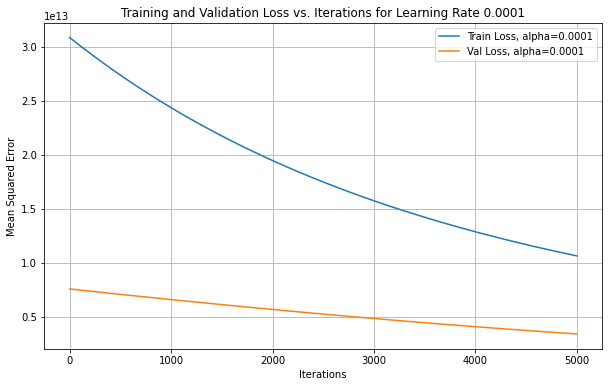

Validation Accuracy for learning rate 0.0001: -19.06658485221723



In [15]:
#PROBLEM 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

# Standardize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a column of ones for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent with L2 Regularization
def gradient_descent(X, y, theta, alpha, num_iterations, lambda_reg):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        # Calculate gradients with L2 regularization
        gradient = (1/m) * (np.dot(X.T, y_pred - y) + lambda_reg * theta)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))

        history_train_loss.append(train_loss)
        history_val_loss.append(val_loss)

        if iteration % 500 == 0:
            print(f'Epoch {iteration}, Train Loss: {train_loss}, Val Loss: {val_loss}')
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_iterations = 5000
initial_theta = np.zeros(X.shape[1])
lambda_reg = 0.3

for learning_rate in learning_rates:
    print(f"Training with learning rate: {learning_rate}")
    theta_copy = initial_theta.copy()
    theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations, lambda_reg)

    plt.figure(figsize=(10, 6))
    plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
    plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
    plt.legend()
    plt.grid()
    plt.show()

    y_val_pred = np.dot(X_val, theta_optimal)
    val_accuracy = 1 - (mean_squared_error(y_val, y_val_pred) / np.var(y_val))
    print(f"Validation Accuracy for learning rate {learning_rate}: {val_accuracy}\n")


In [6]:
#PROBLEM 3
import pandas as pd

csv_file_path = "housing.csv"

df = pd.read_csv(csv_file_path)
print(df.head()) 
    
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_convert:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Training with learning rate: 0.1
Epoch 0, Train Loss: 16234275857624.256, Val Loss: 2453484512478.686
Epoch 500, Train Loss: 1223722609098.9314, Val Loss: 1145928390670.464
Epoch 1000, Train Loss: 1197091386517.1697, Val Loss: 1097031256682.4746
Epoch 1500, Train Loss: 1192837794379.1592, Val Loss: 1085288653372.1572
Epoch 2000, Train Loss: 1191902477437.364, Val Loss: 1082214670646.2449
Epoch 2500, Train Loss: 1191641777905.2961, Val Loss: 1081553902073.5004
Epoch 3000, Train Loss: 1191553675718.1196, Val Loss: 1081525873275.1222
Epoch 3500, Train Loss: 1191519212968.3328, Val Loss: 1081622637832.0757
Epoch 4000, Train Loss: 1191504304130.9043, Val Loss: 1081713715980.5618
Epoch 4500, Train Loss: 1191497423370.6562, Val Loss: 1081776458185.5784


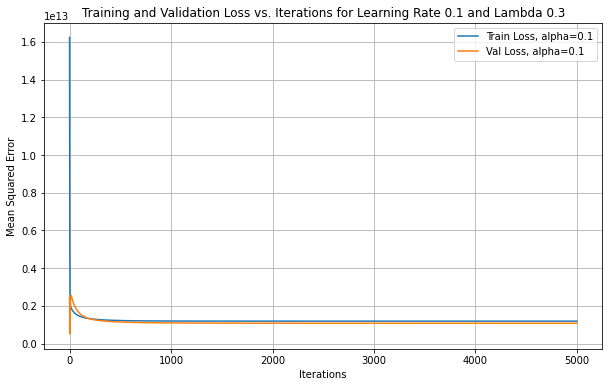

Validation Accuracy for learning rate 0.1: -5.311923419249649

Training with learning rate: 0.01
Epoch 0, Train Loss: 29176411802741.094, Val Loss: 6925842634296.516
Epoch 500, Train Loss: 1625137986812.9932, Val Loss: 2012162278630.9497
Epoch 1000, Train Loss: 1454945338157.1326, Val Loss: 1608956750465.583
Epoch 1500, Train Loss: 1371454697778.8757, Val Loss: 1420324320749.058
Epoch 2000, Train Loss: 1322424711859.0715, Val Loss: 1319013116698.7761
Epoch 2500, Train Loss: 1290603061731.0168, Val Loss: 1258600848309.161
Epoch 3000, Train Loss: 1268528610293.417, Val Loss: 1219516048494.4626
Epoch 3500, Train Loss: 1252485146970.9272, Val Loss: 1192528203856.073
Epoch 4000, Train Loss: 1240433103619.1453, Val Loss: 1172888003055.5715
Epoch 4500, Train Loss: 1231162485022.8306, Val Loss: 1157978816027.868


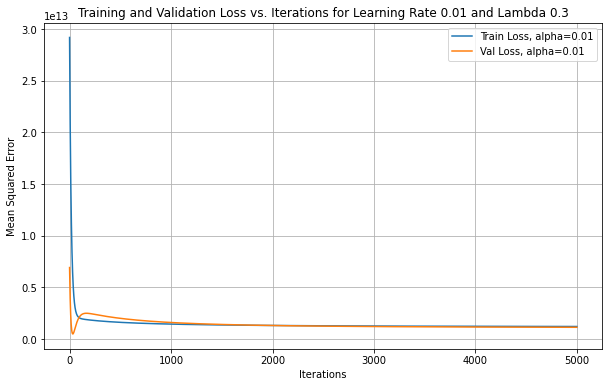

Validation Accuracy for learning rate 0.01: -5.704145720211986

Training with learning rate: 0.001
Epoch 0, Train Loss: 30699810211520.01, Val Loss: 7515457258069.726
Epoch 500, Train Loss: 3484349998881.7007, Val Loss: 857646588969.0613
Epoch 1000, Train Loss: 2049544514132.2493, Val Loss: 2158282890821.299
Epoch 1500, Train Loss: 1913471107209.3206, Val Loss: 2485069951261.725
Epoch 2000, Train Loss: 1851509895471.6025, Val Loss: 2475453821011.949
Epoch 2500, Train Loss: 1800714430717.4976, Val Loss: 2394874663136.6016
Epoch 3000, Train Loss: 1756585134805.2517, Val Loss: 2306282516825.652
Epoch 3500, Train Loss: 1717838504832.1646, Val Loss: 2222754485286.6675
Epoch 4000, Train Loss: 1683569415172.0676, Val Loss: 2146357227715.858
Epoch 4500, Train Loss: 1653058486596.816, Val Loss: 2076854607324.2104


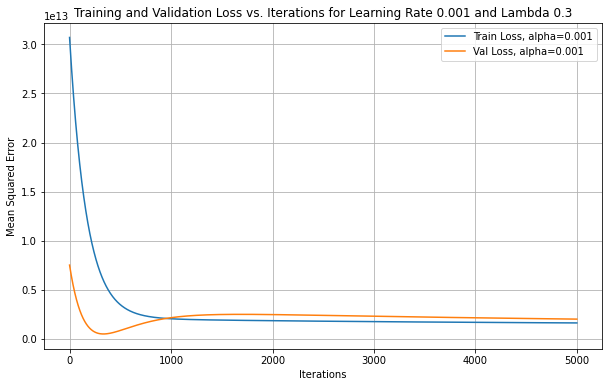

Validation Accuracy for learning rate 0.001: -10.822291751108704

Training with learning rate: 0.0001
Epoch 0, Train Loss: 30854441900540.582, Val Loss: 7575842508562.961
Epoch 500, Train Loss: 23420086820811.977, Val Loss: 4799715085268.701
Epoch 1000, Train Loss: 17906422039437.777, Val Loss: 2962768498190.138
Epoch 1500, Train Loss: 13816616396154.332, Val Loss: 1790168773592.9424
Epoch 2000, Train Loss: 10782368180790.291, Val Loss: 1082706644237.9595
Epoch 2500, Train Loss: 8530654208273.244, Val Loss: 696591245696.9191
Epoch 3000, Train Loss: 6859081052135.575, Val Loss: 528562383110.48224
Epoch 3500, Train Loss: 5617613014184.197, Val Loss: 504932489422.4954
Epoch 4000, Train Loss: 4695027137027.944, Val Loss: 573530544839.8652
Epoch 4500, Train Loss: 4008872350784.9053, Val Loss: 697787683465.6519


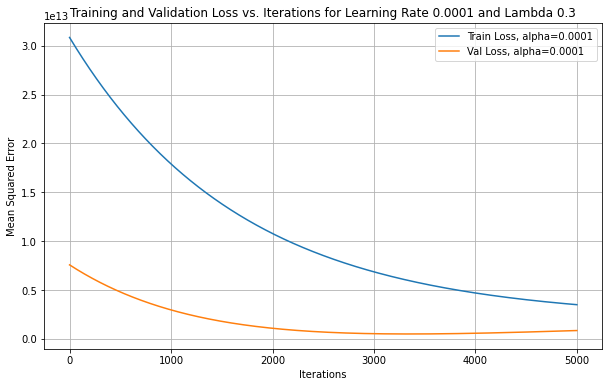

Validation Accuracy for learning rate 0.0001: -4.000967937605678



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = df

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X_numeric = data[numeric_features].values
y = data[target].values

X_categorical = pd.get_dummies(data[categorical_features], drop_first=True).values

X = np.c_[X_numeric, X_categorical]

min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
X = (X - min_vals) / (max_vals - min_vals)

X = np.c_[np.ones(X.shape[0]), X]

split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent with L2 Regularization and Min-Max Normalization
def gradient_descent_with_regularization(X, y, theta, alpha, num_iterations, lambd):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        # Calculate gradients with regularization term
        gradient = (1/m) * np.dot(X.T, y_pred - y) + (lambd/m) * theta

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta)) + (lambd / (2 * m)) * np.sum(theta[1:]**2)
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta)) + (lambd / (2 * m)) * np.sum(theta[1:]**2)
        history_val_loss.append(val_loss)

        if iteration % 500 == 0:
            print(f'Epoch {iteration}, Train Loss: {train_loss}, Val Loss: {val_loss}')
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_iterations = 5000
initial_theta = np.zeros(X.shape[1])
regularization_lambda = 0.3

for learning_rate in learning_rates:
    print(f"Training with learning rate: {learning_rate}")
    theta_copy = initial_theta.copy()
    theta_optimal, train_loss, val_loss = gradient_descent_with_regularization(X_train, y_train, theta_copy, learning_rate, num_iterations, regularization_lambda)

    plt.figure(figsize=(10, 6))
    plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
    plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate} and Lambda {regularization_lambda}')
    plt.legend()
    plt.grid()
    plt.show()

    y_val_pred = np.dot(X_val, theta_optimal)
    val_accuracy = 1 - (mean_squared_error(y_val, y_val_pred) / np.var(y_val))
    print(f"Validation Accuracy for learning rate {learning_rate}: {val_accuracy}\n")
